In [1]:

import numpy as np
import time
import math

from coremerge import get_world_gaussian, get_transmats, get_product, recenter_gaussians
from snn import define_object_pose, get_mean_std, produce_snn_stats
from visuals import plot_gaussians, visualize_3d
from utils import data2text, generate_pdfs

In [2]:
'''
This function produces 3 PDFs from SNN stats and one from the product of these
The function plots the PDFs (in 3 subplots, one per axis) and returns two arrays: mu and sigma
'''
def emulate_SNN_with_pose_transformation(nb_pts, cam_poses, ground_truth, e_per, scenario):

    ## Get info from: optitrack (camera poses) + snn (object poses + stds)
    try:
        # Get transformation matrix (from camera to world) for each camera
        c2w = get_transmats(cam_poses)

        # Define object pose: ground truth and as seen from each camera
        perspective = define_object_pose(c2w, ground_truth)

        # Get stats from validation dataset
        cam_pdf_params = produce_snn_stats(nb_pts, e_per)
    except:
        pass
    
    # Merge observations
    try:        
        start = time.time()

        # Get PDFs from SNN 'observations' (mu|sigma in camera space for each axis|camera)
        mu_c, sigma_c = recenter_gaussians(nb_pts, perspective, cam_pdf_params)  

        # Convert gaussians from camera space to world space and generate PDFs
        mu_w, sigma_w = get_world_gaussian(mu_c, sigma_c, c2w)

        stop = time.time()
        elapsed = stop - start
        print("Global x,y,z obtained after: " + str(1000000*elapsed) + " us")     
    except:
        pass
    
    # Visualize Gaussians
    try:
        xyz_w, pdf_w = generate_pdfs(nb_pts, ground_truth, mu_w, sigma_w) 
        text = data2text(ground_truth, cam_poses, mu_c, sigma_c, mu_w, sigma_w)
        plot_gaussians(xyz_w, pdf_w, text, scenario)    
    except:
        pass
        
    return mu_w, sigma_w

     

In [3]:
scenario = 0

Close to setup upstairs, different <mu|sigma>_<x|y|z> for all cameras
Global x,y,z obtained after: 594.6159362792969 us
The object is likely to be located at (-0.300, 0.600, 0.500)


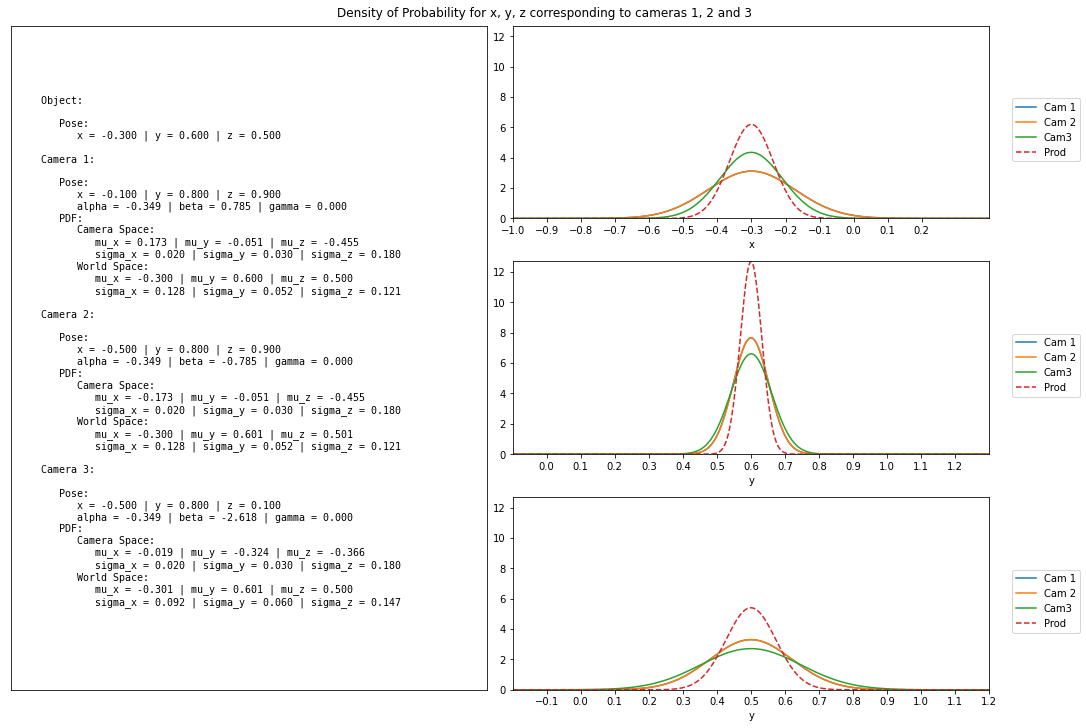

In [4]:

nb_pts = 2000

%matplotlib inline


cam_poses = np.zeros((3,6)) # 3 cameras, 6 parameters

# Cam 1
cam_poses[0,0] = -0.1 # cam1:cx
cam_poses[0,1] =  0.8 # cam1:cy
cam_poses[0,2] =  0.9 # cam1:cz
cam_poses[0,3] = (math.pi/180)*(-20) # cam1:alpha
cam_poses[0,4] = (math.pi/180)*(45) # cam1:beta
cam_poses[0,5] = (math.pi/180)*(0) # cam1:gamma

# Cam 2
cam_poses[1,0] = -0.5 # cam2:cx
cam_poses[1,1] =  0.8 # cam2:cy
cam_poses[1,2] =  0.9 # cam2:cz
cam_poses[1,3] = (math.pi/180)*(-20) # cam2:alpha
cam_poses[1,4] = (math.pi/180)*(-45) # cam2:beta
cam_poses[1,5] = (math.pi/180)*(0) # cam2:gamma

# Cam 3
cam_poses[2,0] = -0.5 # cam3:cx
cam_poses[2,1] =  0.8 # cam3:cy
cam_poses[2,2] =  0.1 # cam3:cz
cam_poses[2,3] = (math.pi/180)*(-20)# cam3:alpha
cam_poses[2,4] = (math.pi/180)*(-150)# cam3:beta
cam_poses[2,5] = (math.pi/180)*(0)# cam3:gamma

# Object's pose
ground_truth = [-0.3, 0.6, 0.5, 1]

# Max error per axis (it applies to all cameras)
e_per = np.array([0.02, 0.03, 0.18]) 

print("Close to setup upstairs, different <mu|sigma>_<x|y|z> for all cameras")
scenario += 1

mu_w, sigma_w = emulate_SNN_with_pose_transformation(nb_pts, cam_poses, ground_truth, e_per, scenario)
